In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import statsmodels.api as sm
%matplotlib inline

/home/tay/ml-2019-08/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """


Проверим статистическую значимость пола для выживания при крушении титаника

In [2]:
data = pd.read_csv('train.csv', index_col=0)

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


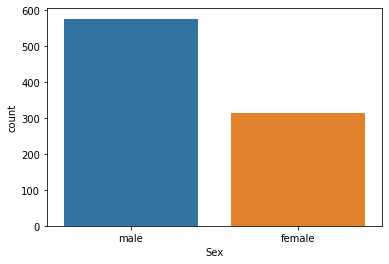

In [4]:
sns.countplot(x='Sex', data=data)

In [5]:
for_del = np.random.choice(
    data[data.Sex == 'male'].index,
    data.Sex.value_counts().male - data.Sex.value_counts().female,
    replace=False
)

In [6]:
data.drop(for_del, inplace=True)

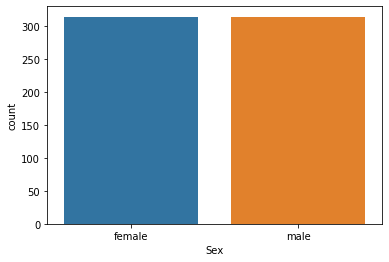

In [7]:
sns.countplot(x='Sex', data=data)

In [8]:
df = data[['Survived', 'Sex']].copy()
df.head()

,Survived,Sex
PassengerId,,
2,1,female
3,1,female
4,1,female
5,0,male
6,0,male


In [9]:
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.162420
Name: Survived, dtype: float64

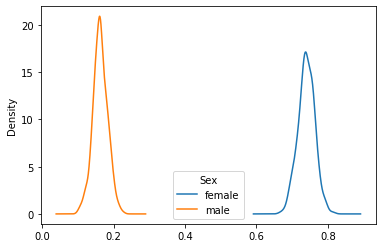

In [10]:
iterations = 500
boot_survived = []
for i in tqdm(range(iterations), leave=False):
    boot_mean = df.sample(frac=1, replace=True).groupby('Sex').Survived.mean()
    boot_survived.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_survived = pd.DataFrame(boot_survived)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_survived.plot.kde()

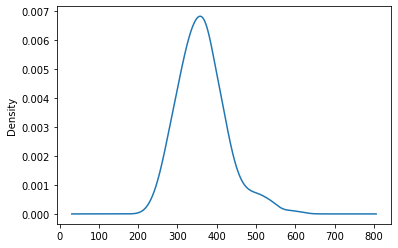

In [11]:
boot_survived['diff'] = (boot_survived.female-boot_survived.male)/boot_survived.male * 100

# Ploting the bootstrap % difference
ax = boot_survived['diff'].plot.kde()

In [12]:
prob = (boot_survived['diff']>0).mean()
print(f"{prob:.1%}")

100.0%


In [13]:
n_rows_female, n_rows_male = df.groupby('Sex').Survived.count()
ret_female, ret_male = df.groupby('Sex').Survived.mean()

In [14]:
n_rows_female, n_rows_male, ret_female, ret_male

(314, 314, 0.7420382165605095, 0.1624203821656051)

In [16]:
z_score, p_value = sm.stats.proportions_ztest([ret_male*n_rows_male, ret_female*n_rows_female], 
                                              [n_rows_male, n_rows_female], 
                                              alternative='smaller')
print("Z-score={0:.3f},  p_value={1:.3f}".format(z_score, p_value))

Z-score=-14.592,  p_value=0.000
